# DOGS & CATS

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemin des datasets
train_dir = "Dogs&Cats/dataset/training_set"
test_dir = "Dogs&Cats/dataset/test_set"

# Préparation des générateurs d'images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des datasets
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'  # Classification binaire (chiens vs chats)
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Construire le modèle CNN
model = Sequential()

# Convolution + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour réduire le surapprentissage
model.add(Dense(1, activation='sigmoid'))  # Sigmoid pour une sortie binaire

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=test_set,
    validation_steps=len(test_set)
)

c:\Users\etien\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.5070 - loss: 0.6950 - val_accuracy: 0.5745 - val_loss: 0.6708
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.6164 - loss: 0.6561 - val_accuracy: 0.6485 - val_loss: 0.6190
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.6615 - loss: 0.6079 - val_accuracy: 0.7040 - val_loss: 0.5607
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.7106 - loss: 0.5642 - val_accuracy: 0.7150 - val_loss: 0.5599
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7388 - loss: 0.5272 - val_accuracy: 0.7745 - val_loss: 0.4719
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.7642 - loss: 0.4859 - val_accuracy: 0.7670 - val_loss: 0.4785
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.7697 - loss: 0.4689 - val_accuracy: 0.7945 - val_loss: 0.4500
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.7910 - loss: 0.4434 -

In [13]:
# Évaluer le modèle
loss, accuracy = model.evaluate(test_set)
print(f"Perte sur le jeu de test : {loss:.4f}")
print(f"Précision sur le jeu de test : {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8140 - loss: 0.4194
Perte sur le jeu de test : 0.4171
Précision sur le jeu de test : 0.8185


In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Charger une image pour la prédiction
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array = img_array / 255.0  # Normalisation

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        print(f"L'image {image_path} est un chien (probabilité : {prediction[0][0]:.2f})")
    else:
        print(f"L'image {image_path} est un chat (probabilité : {1 - prediction[0][0]:.2f})")

# Tester avec vos images
predict_image("Dogs&Cats/dataset/single_prediction/cat_or_dog_1.jpg")
predict_image("Dogs&Cats/dataset/single_prediction/cat_or_dog_2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
L'image Dogs&Cats/dataset/single_prediction/cat_or_dog_1.jpg est un chien (probabilité : 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
L'image Dogs&Cats/dataset/single_prediction/cat_or_dog_2.jpg est un chat (probabilité : 0.92)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

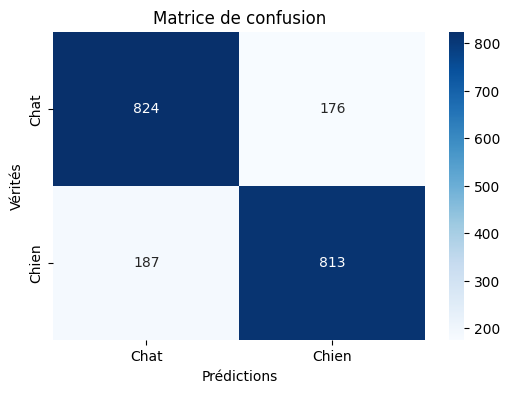

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Générer des prédictions sur le jeu de test
y_pred = []
y_true = []

# Collecte des vraies étiquettes et des prédictions
for images, labels in test_set:
    predictions = model.predict(images)
    y_pred.extend((predictions > 0.5).astype(int).flatten())  # Classes prédites (0 ou 1)
    y_true.extend(labels.astype(int).flatten())  # Classes vraies
    if len(y_true) >= test_set.samples:  # Limiter aux échantillons disponibles
        break

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Chat", "Chien"], yticklabels=["Chat", "Chien"])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()

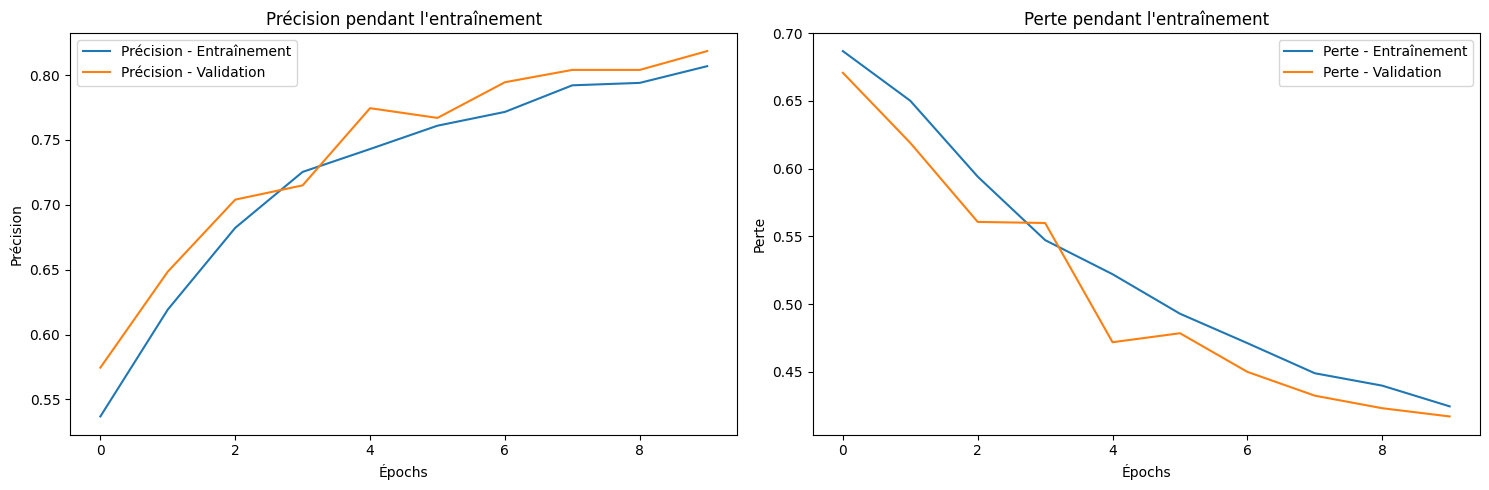

In [19]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Courbe de précision (left subplot)
ax1.plot(history.history['accuracy'], label='Précision - Entraînement')
ax1.plot(history.history['val_accuracy'], label='Précision - Validation')
ax1.set_title('Précision pendant l\'entraînement')
ax1.set_xlabel('Épochs')
ax1.set_ylabel('Précision')
ax1.legend()

# Courbe de perte (right subplot)
ax2.plot(history.history['loss'], label='Perte - Entraînement')
ax2.plot(history.history['val_loss'], label='Perte - Validation')
ax2.set_title('Perte pendant l\'entraînement')
ax2.set_xlabel('Épochs')
ax2.set_ylabel('Perte')
ax2.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [17]:
from sklearn.metrics import classification_report

# Rapport de classification
report = classification_report(y_true, y_pred, target_names=["Chat", "Chien"])
print(report)

              precision    recall  f1-score   support

        Chat       0.82      0.82      0.82      1000
       Chien       0.82      0.81      0.82      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



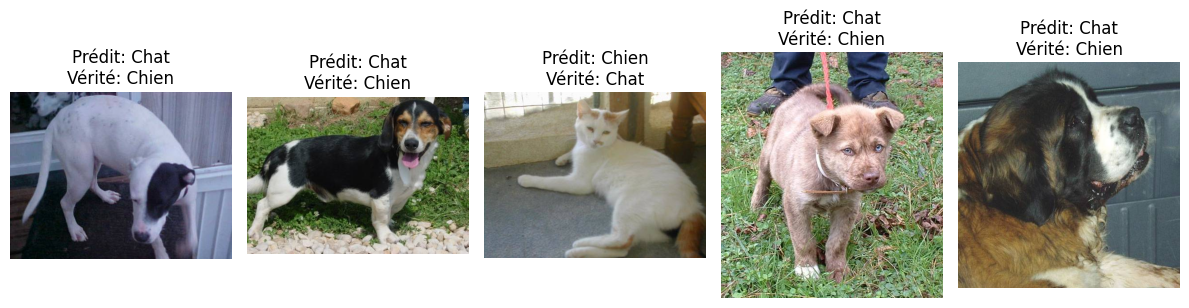

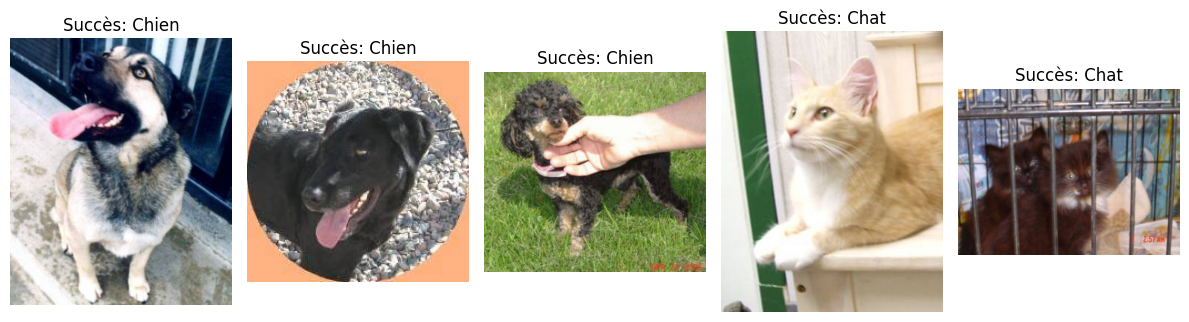

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2  # Utilisation de OpenCV


# Définir les chemins vers les dossiers d'images
dossier_chats = "Dogs&Cats/dataset/test_set/cats"
dossier_chiens = "Dogs&Cats/dataset/test_set/dogs"


# Fonction pour charger les chemins des images et leurs étiquettes
def charger_images(dossier):
    chemins_images = []
    etiquettes = []
    for nom_fichier in os.listdir(dossier):
        if nom_fichier.endswith(('.jpg', '.jpeg', '.png')):  # Vérifier le format de l'image
            chemin_image = os.path.join(dossier, nom_fichier)
            chemins_images.append(chemin_image)
            # Déterminer l'étiquette en fonction du dossier
            etiquette = 0 if "cats" in dossier else 1  # 0 pour chat, 1 pour chien
            etiquettes.append(etiquette)
    return chemins_images, etiquettes


# Charger les images et les étiquettes
chemins_chats, etiquettes_chats = charger_images(dossier_chats)
chemins_chiens, etiquettes_chiens = charger_images(dossier_chiens)

# Combiner les chemins et les étiquettes
chemins_images = chemins_chats + chemins_chiens
etiquettes_vraies = etiquettes_chats + etiquettes_chiens

# Mélanger les données
indices = list(range(len(chemins_images)))
random.shuffle(indices)

chemins_images = [chemins_images[i] for i in indices]
etiquettes_vraies = [etiquettes_vraies[i] for i in indices]


# Convertir les prédictions et les vraies étiquettes en tableaux NumPy
y_pred = np.array(y_pred)
y_true = np.array(etiquettes_vraies)

# Trouver les erreurs et les succès
erreurs = np.where(y_pred != y_true)[0]
succes = np.where(y_pred == y_true)[0]


# Fonction pour afficher les images
def afficher_images(indices, est_erreur=True, nombre_images=5):
    nombre_a_afficher = min(nombre_images, len(indices))
    plt.figure(figsize=(12, 6))
    for i in range(nombre_a_afficher):
        index = indices[i]
        chemin_image = chemins_images[index] # Utilisez le bon index dans la liste des chemins

        try:
            # Charger l'image avec OpenCV
            image = cv2.imread(chemin_image)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convertir BGR en RGB

            plt.subplot(1, nombre_a_afficher, i + 1)
            plt.imshow(image)
            plt.axis('off')

            # Afficher le titre
            if est_erreur:
                titre = f"Prédit: {'Chien' if y_pred[index] else 'Chat'}\nVérité: {'Chien' if y_true[index] else 'Chat'}"
            else:
                titre = f"Succès: {'Chien' if y_pred[index] else 'Chat'}"
            plt.title(titre)

        except Exception as e:
            print(f"Erreur lors de l'affichage de l'image {chemin_image}: {e}")
            continue

    plt.tight_layout()
    plt.show()


# Afficher quelques erreurs
afficher_images(erreurs, est_erreur=True)

# Afficher quelques succès
afficher_images(succes, est_erreur=False)